# Challenge 1
Run the KMeans in your own Twitter data to create segments for users. Try different numbers of clusters, and columns that might be more meaningful. What works best? How do you evaluate?

Merge the best user segmentation you found back with the tweets data, and do some visualizations of key metrics from the tweets data with each user segment. What insights do you get?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweet=pd.read_excel('tcat-peyongchang.xlsx')

In [3]:
tweet.columns

Index(['id', 'time', 'created_at', 'from_user_name', 'text', 'filter_level',
       'possibly_sensitive', 'withheld_copyright', 'withheld_scope',
       'truncated', 'retweet_count', 'favorite_count', 'lang', 'to_user_name',
       'in_reply_to_status_id', 'quoted_status_id', 'source', 'location',
       'lat', 'lng', 'from_user_id', 'from_user_realname',
       'from_user_verified', 'from_user_description', 'from_user_url',
       'from_user_profile_image_url', 'from_user_utcoffset',
       'from_user_timezone', 'from_user_lang', 'from_user_tweetcount',
       'from_user_followercount', 'from_user_friendcount',
       'from_user_favourites_count', 'from_user_listed',
       'from_user_withheld_scope', 'from_user_created_at'],
      dtype='object')

In [4]:
users=tweet[['from_user_name','from_user_id','from_user_realname','from_user_verified', 'from_user_description', 'from_user_url',
       'from_user_profile_image_url', 'from_user_utcoffset',
       'from_user_timezone', 'from_user_lang', 'from_user_tweetcount',
       'from_user_followercount', 'from_user_friendcount',
       'from_user_favourites_count', 'from_user_listed',
       'from_user_withheld_scope', 'from_user_created_at']]

In [5]:
users = users.drop_duplicates(subset='from_user_name')

In [6]:
users['from_user_lang'].value_counts()

en       313
ru        29
ja        20
nl        17
fr        17
it        12
pt         7
pl         6
de         4
es         4
fi         3
no         3
en-gb      1
Name: from_user_lang, dtype: int64

In [7]:
def check_lang(lang, desired_lang):
    if lang == desired_lang:
        return 1
    return 0

In [8]:
users['en'] = users['from_user_lang'].apply(check_lang, args=('en',))
users['ru'] = users['from_user_lang'].apply(check_lang, args=('ru',))
users['ja'] = users['from_user_lang'].apply(check_lang, args=('ja',))
users['fr'] = users['from_user_lang'].apply(check_lang, args=('fr',))
users['nl'] = users['from_user_lang'].apply(check_lang, args=('nl',))
users['it'] = users['from_user_lang'].apply(check_lang, args=('it',))

*Finding the suitable Kmeans*

In [9]:
from sklearn.cluster import KMeans

In [16]:
Ks = range(2, 10)
kmeans = [KMeans(n_clusters=i) for i in Ks]
score = [kmeans[i].fit(users[['en', 'ru', 'ja', 'fr', 'nl', 'it', 'from_user_friendcount', 'from_user_tweetcount']]).score(users[['en', 'ru', 'ja', 'fr', 'nl', 'it', 'from_user_friendcount', 'from_user_tweetcount']]) for i in range(len(kmeans))]

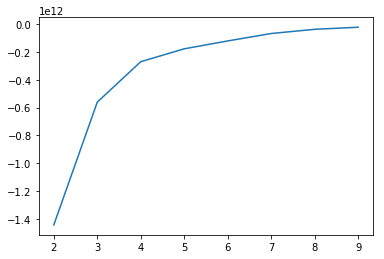

In [17]:
plt.plot(Ks,score)

I found something called "the Elbow method" to find the best Kmeans: "Start with K=2, and keep increasing it in each step by 1, calculating your clusters and the cost that comes with the training. At some value for K the cost drops dramatically, and after that it reaches a plateau when you increase it further. This is the K value you want."
https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method
However the results I got here is opposite to the guideline in the sense that my score went up rather than going down. I assumed that the rule still applies and followed it. And also when I changed the Ks range different results were generated. For Ks range from (1,10) the best kmeans is 2, for (2,10) it is 4 (as shown in the plot), for (2,20) it is 5. 

In [18]:
kmeans1 = KMeans(n_clusters=4)

In [19]:
users['segment'] = kmeans1.fit_predict(users[['en', 'ru', 'ja', 'fr', 'nl', 'it', 'from_user_friendcount', 'from_user_tweetcount']])

In [20]:
users[['en', 'ru', 'ja', 'fr', 'nl', 'it', 'from_user_friendcount','from_user_tweetcount', 'segment']].groupby('segment').mean().transpose()

segment,0,1,2,3
en,0.725441,0.0,0.676471,0.666667
ru,0.073048,0.0,0.000000,0.000000
ja,0.045340,0.0,0.058824,0.000000
fr,0.037783,0.0,0.058824,0.000000
nl,0.035264,0.0,0.088235,0.000000
it,0.020151,1.0,0.029412,0.333333
from_user_friendcount,698.284635,794.0,2256.676471,4207.333333
from_user_tweetcount,10108.942065,1847586.0,133677.323529,502919.666667


In [21]:
kmeans2 = KMeans(n_clusters=10)
users['segment2'] = kmeans2.fit_predict(users[['en', 'ru', 'ja', 'fr', 'nl', 'it', 'from_user_friendcount', 'from_user_tweetcount']])
users[['en', 'ru', 'ja', 'fr', 'nl', 'it', 'from_user_friendcount','from_user_tweetcount', 'segment2']].groupby('segment2').mean().transpose()

segment2,0,1,2,3,4,5,6,7,8,9
en,0.656934,0.0,0.5,0.636364,0.0,0.727273,1.0,0.25,0.680851,0.785714
ru,0.175182,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.023810
ja,0.036496,0.0,0.0,0.090909,0.0,0.045455,0.0,0.00,0.106383,0.038095
fr,0.021898,0.0,0.0,0.090909,0.0,0.045455,0.0,0.00,0.042553,0.047619
nl,0.029197,0.0,0.0,0.000000,0.0,0.090909,0.0,0.50,0.042553,0.033333
it,0.029197,1.0,0.5,0.090909,1.0,0.000000,0.0,0.00,0.042553,0.009524
from_user_friendcount,774.452555,1588.0,5470.0,2605.909091,0.0,1611.181818,1682.0,3884.75,1378.638298,492.380952
from_user_tweetcount,12402.832117,2015966.0,408639.5,165500.090909,1679206.0,88317.772727,691480.0,247633.50,33006.595745,2636.928571


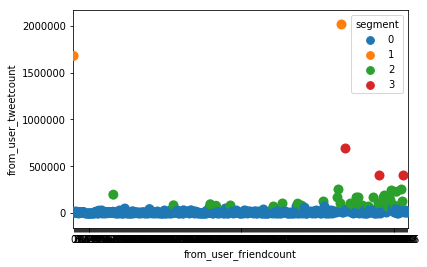

In [23]:
sns.swarmplot(x="from_user_friendcount", y="from_user_tweetcount", data=users, hue="segment", size=10)

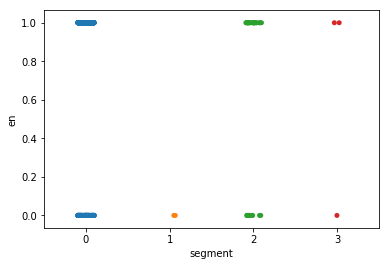

In [24]:
sns.stripplot(x="segment", y="en", data=users, jitter=True)

In [25]:
users_segment=users[['from_user_name','segment']]

In [26]:
tweet_with_segments = tweet.merge(users_segment, how="left", on="from_user_name")

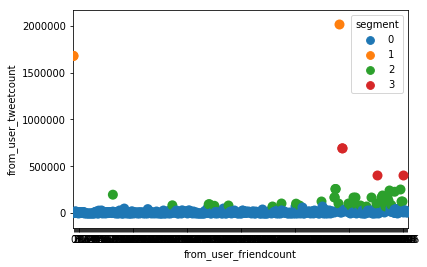

In [27]:
sns.swarmplot(x="from_user_friendcount", y="from_user_tweetcount", data=tweet_with_segments, hue="segment", size=10)

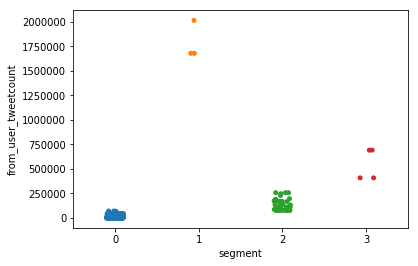

In [28]:
sns.stripplot(x="segment", y="from_user_tweetcount", data=tweet_with_segments, jitter=True)

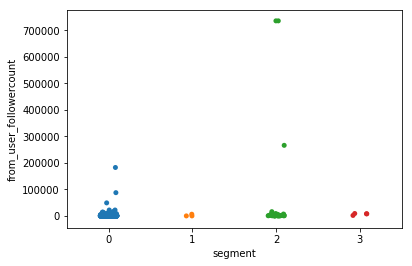

In [29]:
sns.stripplot(x="segment", y="from_user_followercount", data=tweet_with_segments, jitter=True)

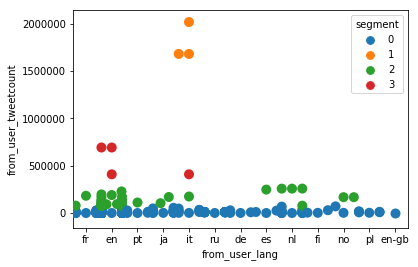

In [30]:
sns.swarmplot(x="from_user_lang", y="from_user_tweetcount", data=tweet_with_segments, hue="segment", size=10)

In [31]:
users.to_pickle('Nhung_users_segmented.pkl')
tweet_with_segments.to_pickle('NhungTweetWithSegments.pkl')

# Challenge 2
Change the features of the logistic model created in scikit-learn, and see if you get to a better model to predict clicks. How does this model look like? How do you know it is actually better than the one I created?

Create a model for predicting sell.

In [32]:
webdata = pd.read_excel('web_campaign_simulated.xlsx')

In [33]:
webdata.head()

,id,age,female,used_search,referral,time_spent,campaign_1,campaign_2,click,sell_old,sell
0,1,40,1,1,tumblr,204,1,0,0,1,0
1,2,49,0,0,,239,1,0,0,0,1
2,3,20,1,0,google,238,0,0,0,1,1
3,4,19,1,0,google,111,1,1,0,1,0
4,5,46,1,1,twitter,159,0,0,1,1,0


In [34]:
def check_referral(referral, site):
    if referral == site:
        return 1
    return 0

In [35]:
webdata['google'] = webdata['referral'].apply(check_referral, args=('google',))
webdata['facebook'] = webdata['referral'].apply(check_referral, args=('facebook',))
webdata['news_a'] = webdata['referral'].apply(check_referral, args=('newsletter A',))
webdata['news_b'] = webdata['referral'].apply(check_referral, args=('newsletter B',))
webdata['nyt'] = webdata['referral'].apply(check_referral, args=('nyt',))
webdata['tumblr'] = webdata['referral'].apply(check_referral, args=('tumblr',))
webdata['twitter'] = webdata['referral'].apply(check_referral, args=('twitter',))

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logit_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [38]:
features = ['age', 'female', 'facebook', 'sell_old','used_search', 'campaign_2']

In [39]:
logit_clf.fit(webdata[features], webdata['click'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
people = [[25, 1,0,208,0,0], [12,0,1,112,0,1]]
logit_clf.predict_proba(people)

array([[ 0.,  1.],
       [ 0.,  1.]])

I supposed that if the resulting array is closer to rounded numbers (the closer they are to 0 and 1), the more accurate the prediction is. However, whatever I changed the value of people to, the resulting array didnt change, which make me doubt the result.

In [41]:
logit_clf.fit(webdata[features], webdata['sell'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
people = [[25, 0,0,208,0,0], [78,0,1,200,1,1]]
logit_clf.predict_proba(people)

array([[  1.79856130e-14,   1.00000000e+00],
       [  4.61852778e-14,   1.00000000e+00]])

In [43]:
features2 = ['age', 'female', 'twitter', 'sell_old','used_search', 'campaign_1']

In [46]:
logit_clf.fit(webdata[features2], webdata['sell'])
people = [[30, 0,0,208,0,0], [65,0,1,200,1,1],[15,1,1,0,0,0],[47,1,0,1,1,1]]
logit_clf.predict_proba(people)

array([[  3.90798505e-14,   1.00000000e+00],
       [  1.14575016e-13,   1.00000000e+00],
       [  6.62184639e-01,   3.37815361e-01],
       [  6.08878725e-01,   3.91121275e-01]])